In [332]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor

In [333]:
#Read dataset yang digunakan
dataset = pd.read_csv('../../dataset/donation.csv')

In [334]:
# Tampilkan informasi tentang dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419 entries, 0 to 418
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Tahun       419 non-null    int64 
 1   Bulan       419 non-null    int64 
 2   Jenis       419 non-null    object
 3   Donasi      419 non-null    int64 
 4   JumlahData  419 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.5+ KB


In [335]:
# Tampilkan beberapa baris pertama dari dataset
dataset.head()

,Tahun,Bulan,Jenis,Donasi,JumlahData
0,2018,1,CILKUR,12015348,36
1,2018,1,INFAK,1069019814,3713
2,2018,1,INFAK TEMATIK,380513612,614
3,2018,1,INFAK TERIKAT,3244000,13
4,2018,1,KEMANUSIAAN,465542857,586


In [336]:
# Tampilkan deskripsi statistik dari dataset
dataset.describe()

,Tahun,Bulan,Donasi,JumlahData
count,419.000000,419.000000,4.190000e+02,419.000000
mean,2019.496420,6.479714,2.434773e+09,2984.797136
std,1.120433,3.442132,6.406070e+09,5819.713238
min,2018.000000,1.000000,-3.774340e+05,1.000000
25%,2018.500000,4.000000,1.778365e+07,19.500000
50%,2019.000000,6.000000,5.464254e+08,751.000000
75%,2020.500000,9.000000,1.433551e+09,3061.500000
max,2021.000000,12.000000,5.545576e+10,57722.000000


In [337]:
# Periksa tipe data untuk setiap kolom
print("Tipe data kolom:")
print(dataset.dtypes)

Tipe data kolom:
Tahun          int64
Bulan          int64
Jenis         object
Donasi         int64
JumlahData     int64
dtype: object


In [338]:
# Pengecekan duplikasi data pada keseluruhan dataset
duplicate_rows = dataset.duplicated()
duplicate_count = duplicate_rows.sum()
print(f"Jumlah duplikasi data pada keseluruhan dataset: {duplicate_count}")

Jumlah duplikasi data pada keseluruhan dataset: 0


In [339]:
# Periksa jumlah nilai yang hilang untuk setiap kolom
print("Jumlah nilai hilang per kolom:")
print(dataset.isnull().sum())

Jumlah nilai hilang per kolom:
Tahun         0
Bulan         0
Jenis         0
Donasi        0
JumlahData    0
dtype: int64


In [340]:
dataset.head()

,Tahun,Bulan,Jenis,Donasi,JumlahData
0,2018,1,CILKUR,12015348,36
1,2018,1,INFAK,1069019814,3713
2,2018,1,INFAK TEMATIK,380513612,614
3,2018,1,INFAK TERIKAT,3244000,13
4,2018,1,KEMANUSIAAN,465542857,586


In [341]:
# Apply label encoder on "Jenis" column
encoder = LabelEncoder()
dataset_encoded = dataset
dataset_encoded['Jenis'] = encoder.fit_transform(dataset_encoded['Jenis'])

In [342]:
dataset_encoded.head()

,Tahun,Bulan,Jenis,Donasi,JumlahData
0,2018,1,0,12015348,36
1,2018,1,1,1069019814,3713
2,2018,1,2,380513612,614
3,2018,1,3,3244000,13
4,2018,1,4,465542857,586


In [343]:
# Memisahkan fitur (features) dan target
X = dataset_encoded.drop(['Donasi', 'JumlahData'], axis = 1)
y = dataset_encoded['JumlahData']

In [344]:
X.head()

,Tahun,Bulan,Jenis
0,2018,1,0
1,2018,1,1
2,2018,1,2
3,2018,1,3
4,2018,1,4


In [345]:
y.head()

0      36
1    3713
2     614
3      13
4     586
Name: JumlahData, dtype: int64

In [346]:
# Membagi data menjadi data latih dan data uji
train_size = int(len(dataset_encoded) * 0.80)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [347]:
# Membuat model Random Forest Regression
model = RandomForestRegressor(n_estimators=100, random_state=3)
model.fit(X_train, y_train)


RandomForestRegressor(max_depth=10, max_features='sqrt', n_estimators=800,
                      random_state=0)

In [348]:
# Melakukan prediksi pada data uji
y_pred = model.predict(X_test)

In [349]:
print('Hasil prediksi:', y_pred)

Hasil prediksi: [ 3000.02354654  3833.82546743  2629.27049515  2723.22840412
  3250.57607786 11603.895        892.81345238  3267.73161905
  5842.16787847  2679.55184245  3879.02980853  2503.3147798
  2280.978203    2478.64866093  3165.22434758 12176.2575
  1369.49583333  5135.70235164  9339.51799747  2704.29862524
  2864.75105685  2214.93853234  1743.96924126  1969.0991419
  3269.41223403 22244.1225       731.05333333  3197.51900271
  5407.68337622  1990.62018228  2364.54706605  2776.32860859
  2383.86110322  2331.57585803  2894.97689452 15079.4975
   772.00109375  3204.00934551  5035.13050771  2084.9547597
  3027.36923874 11083.0520185   4186.69618976 11140.23875
   739.61462798  3142.73505235  4939.31611932  1741.97535395
  1991.83799762  3106.10796339  2555.80238322 11094.54083333
   714.16153869  3210.92016247  5245.13811733  1585.88783541
  1807.34901876  1405.38919296  2423.87927597 11108.05
   788.40099107  3237.49962874  5516.79687527  1557.04692622
  1758.99606844  2307.172507

In [350]:
# Menghitung MAPE (Mean Absolute Percentage Error)
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, model.predict(X_test))
mse = metrics.mean_squared_error(y_test, model.predict(X_test))
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)


In [351]:
print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
formatted_rmse = '{:,.0f}'.format(rmse)
print(f'RMSE: ', formatted_rmse)
print(f'MAPE: {mape:.2f}%')

MAE: 3014.83
MSE: 16064590.00
RMSE:  4,008
MAPE: 176.61%


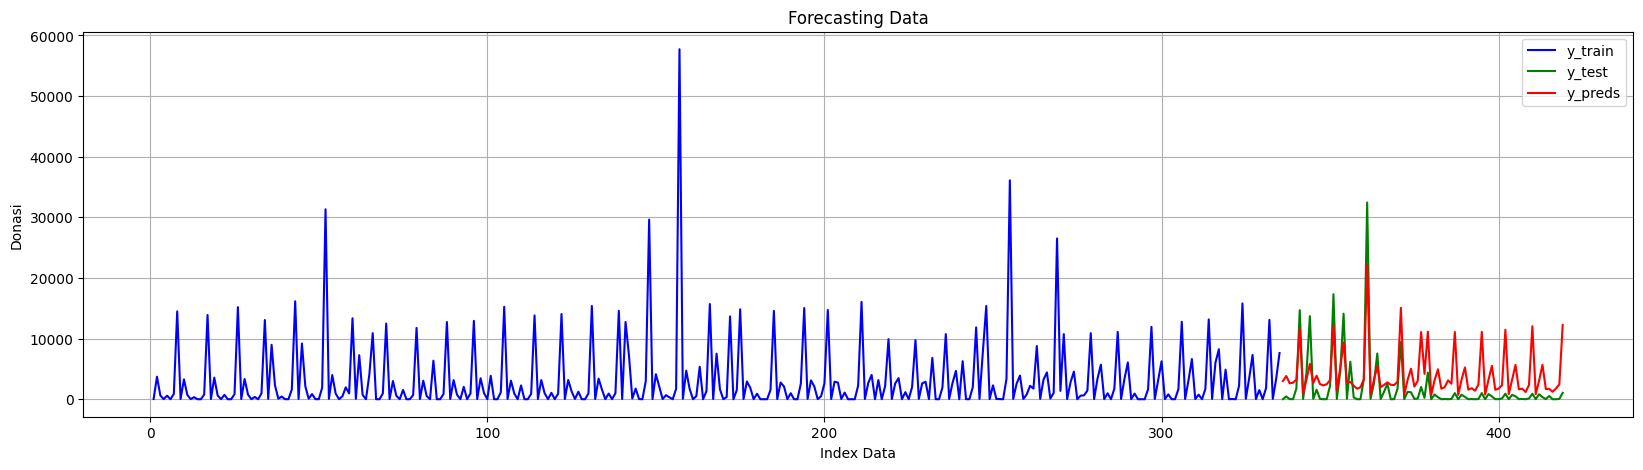

In [352]:
import matplotlib.pyplot as plt
import numpy as np

# Generate x-axis values (assuming a linear sequence)
x = np.arange(1, len(y_train) + len(y_test) + 1)

# Define utils of plot
plt.figure(figsize = (20, 5))

# Plot the data
plt.plot(x[:len(y_train)], y_train, label='y_train', color='blue')
plt.plot(x[len(y_train):len(y_train)+len(y_test)], y_test, label='y_test', color='green')
plt.plot(x[len(y_train):len(y_train)+len(y_pred)], y_pred, label='y_preds', color='red')

# Add labels and legend
plt.legend()
plt.grid(True)
plt.title("Forecasting Data")
plt.xlabel("Index Data")
plt.ylabel("Donasi")

# Show the plot
plt.show()

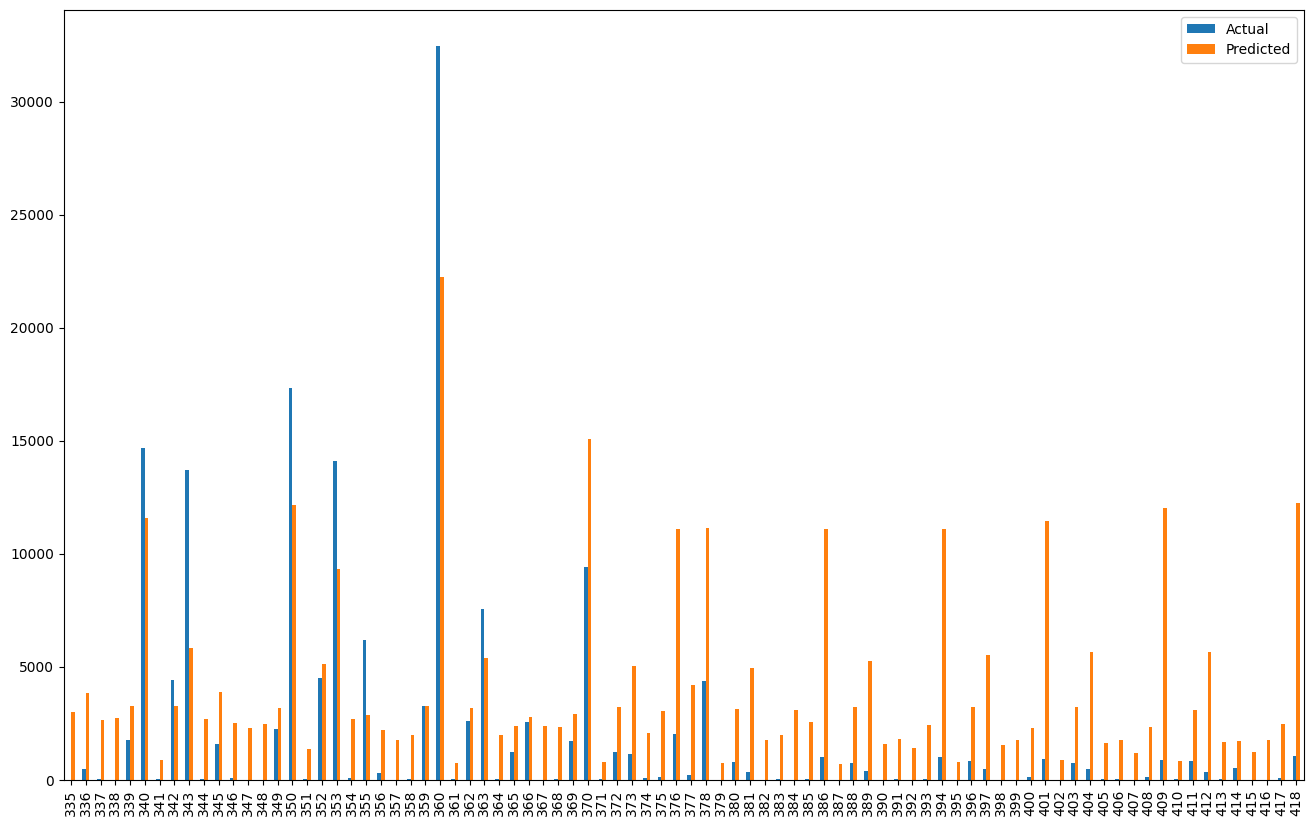

In [353]:
graph = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
graph.plot(kind='bar',figsize=(16,10));

In [354]:
# # Menyiapkan DataFrame hasil prediksi
hasil_prediksi = pd.DataFrame({
    'Tahun': dataset['Tahun'].iloc[train_size:],
    'Bulan': dataset['Bulan'].iloc[train_size:],
    'Jenis': dataset['Jenis'].iloc[train_size:],
    'Prediksi_Donasi': y_pred,
    'Ekspetasi_Donasi': y_test,
    'RMSE': formatted_rmse,
    'MAPE': mape
})

In [355]:
# Menyimpan hasil prediksi ke file Excel
hasil_prediksi.to_excel('../../dataset/prediksiJumData.xlsx', index=False)

In [356]:
# load libraries
import pickle

In [357]:
# overview label encoding result
class_to_idx = {j:i for (i, j) in enumerate(encoder.classes_)}
class_to_idx

{'CILKUR': 0,
 'INFAK': 1,
 'INFAK TEMATIK': 2,
 'INFAK TERIKAT': 3,
 'KEMANUSIAAN': 4,
 'KURBAN': 5,
 'LAIN-LAIN': 6,
 'NON HALAL': 7,
 'WAKAF': 8,
 'ZAKAT': 9}

In [358]:
# overview tahun distribution
dataset_encoded['Tahun'].value_counts()

Tahun
2019    106
2018    105
2021    105
2020    103
Name: count, dtype: int64

In [359]:
# overview tahun distribution
dataset_encoded['Bulan'].value_counts()

Bulan
5     38
3     36
6     36
12    36
1     35
4     35
8     35
9     35
10    35
2     33
7     33
11    32
Name: count, dtype: int64

In [360]:
# save model - this is importance step
pickle.dump(model, open("../model/random_forest_jumdata.pkl", "wb"))

In [361]:
# define sample scenario data
tahun = 2020
bulan = 1
jenis = "INFAK"

model.predict([[
    tahun, 
    bulan, 
    class_to_idx[jenis]
]])

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([2631.04114452])

In [362]:
import sklearn as s
s.__version__

'1.2.2'

In [363]:
dataset_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419 entries, 0 to 418
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Tahun       419 non-null    int64
 1   Bulan       419 non-null    int64
 2   Jenis       419 non-null    int32
 3   Donasi      419 non-null    int64
 4   JumlahData  419 non-null    int64
dtypes: int32(1), int64(4)
memory usage: 14.9 KB
